## No Show Appointments Analysis
## Molly Sutthasilp 

1. Introduction
2. Data Wrangling
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering
6. Model 
7. Learning Plan (Need your comment or suggestion)

This dataset contains the records from 300,000 medical appointments in Brazil. The dataset describes different characteristics of each appointment (rather than of each patient):  
- Gender 
- ScheduledDay &mdash; the day when the patient scheduled their appointment 
- AppointmentDay- registeration date , appoinement date, awaiting time
- Age
- Scholarship &mdash; 1 if the patient is enrolled into Brazilian welfare program Bolsa Familia. 
- Hipertension, Diabetis, Alcoholism, Handcap, Smoke
- SMS_received &mdash; whether a patient received an SMS before the appointment 
- Status; show, no show

The goal is to explore what factors influence if the patient shows up for their appointment. The variable of interest is binary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import seaborn as sns



/databricks/python/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
 "This module will be removed in 0.20.", DeprecationWarning)

In [4]:
data = pd.read_csv('/dbfs/FileStore/tables/noshow.csv')

# shape
print("shape:",data.shape,"\n")

# head
print("First records of data:\n",data.head(),"\n")

#dtype data
print(data.info())

('shape:', (300000, 15), '\n')
('First records of data:\n', Age Gender AppointmentRegistration ApointmentData DayOfTheWeek \
0 19 M 2014-12-16T14:46:25Z 2015-01-14T00:00:00Z Wednesday 
1 24 F 2015-08-18T07:01:26Z 2015-08-19T00:00:00Z Wednesday 
2 4 F 2014-02-17T12:53:46Z 2014-02-18T00:00:00Z Tuesday 
3 5 M 2014-07-23T17:02:11Z 2014-08-07T00:00:00Z Thursday 
4 38 M 2015-10-21T15:20:09Z 2015-10-27T00:00:00Z Tuesday 

 Status Diabetes Alcoolism HiperTension Handcap Smokes Scholarship \
0 Show-Up 0 0 0 0 0 0 
1 Show-Up 0 0 0 0 0 0 
2 Show-Up 0 0 0 0 0 0 
3 Show-Up 0 0 0 0 0 0 
4 Show-Up 0 0 0 0 0 0 

 Tuberculosis Sms_Reminder AwaitingTime 
0 0 0 -29 
1 0 0 -1 
2 0 0 -1 
3 0 1 -15 
4 0 1 -6 , '\n')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
Age 300000 non-null int64
Gender 300000 non-null object
AppointmentRegistration 300000 non-null object
ApointmentData 300000 non-null object
DayOfTheWeek 300000 non-null object
Status 300000 non-null object
Diabetes 300000 non-null int64
Alcoolism 300000 non-null int64
HiperTension 300000 non-null int64
Handcap 300000 non-null int64
Smokes 300000 non-null int64
Scholarship 300000 non-null int64
Tuberculosis 300000 non-null int64
Sms_Reminder 300000 non-null int64
AwaitingTime 300000 non-null int64
dtypes: int64(10), object(5)
memory usage: 34.3+ MB
None

Data Wrangling

General Properties
Back to Top

In [6]:
''' working on freq graph by features

def Con_fea_plots():

    plt.figure(figsize=(20,10))
    
#plot histogram for continuous variable 
    for i, cv in enumerate(continuous_vars):
        plt.subplots(1,2)
        data[cv].value_counts().plot(kind='hist', title=cv)
        plt.ylabel('Frequency')
        
        display()

    for i, dv1 in enumerate(discrete_vars1):
        plt.subplots(1,4)
        data[dv1].value_counts().plot(kind='bar', title=dv1)
        plt.ylabel('Frequency')
        
        display()

    for i, dv3 in enumerate(discrete_vars2):
        fig3 = plt.subplots(2,3)
        data[dv2].value_counts().plot(kind='bar', title=dv2)
        plt.ylabel('Frequency')
        
        display()

Con_fea_plots()
'''

Out[ 3 ]: " working on freq graph by features\n\ndef Con_fea_plots():\n\n plt.figure(figsize=(20,10))\n \n#plot histogram for continuous variable \n for i, cv in enumerate(continuous_vars):\n plt.subplots(1,2)\n data[cv].value_counts().plot(kind='hist', title=cv)\n plt.ylabel('Frequency')\n \n display()\n\n for i, dv1 in enumerate(discrete_vars1):\n plt.subplots(1,4)\n data[dv1].value_counts().plot(kind='bar', title=dv1)\n plt.ylabel('Frequency')\n \n display()\n\n for i, dv3 in enumerate(discrete_vars2):\n fig3 = plt.subplots(2,3)\n data[dv2].value_counts().plot(kind='bar', title=dv2)\n plt.ylabel('Frequency')\n \n display()\n\nCon_fea_plots()\n"

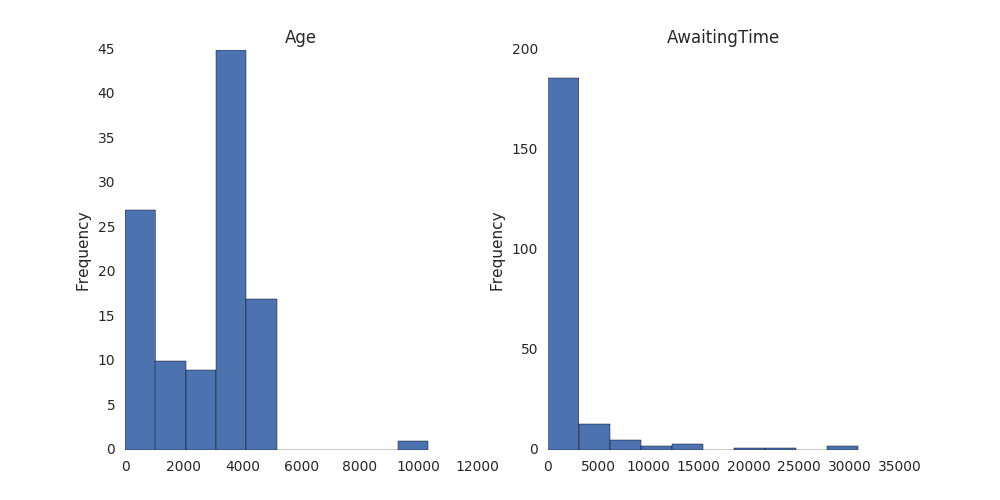

In [7]:
discrete_vars1 = ['Gender', 'DayOfTheWeek', 'Scholarship',  'Sms_Reminder']
discrete_vars2 = ['Diabetes','Alcoolism', 'HiperTension', 'Handcap', 'Smokes','Tuberculosis']
continuous_vars = ['Age', 'AwaitingTime']
target_var = ['Status']

plt.figure(figsize=(10,5))
for i, cv in enumerate(continuous_vars):
        plt.subplot(1,2,i+1)
        data[cv].value_counts().plot(kind='hist', title=cv)
        plt.ylabel('Frequency')
        
display()

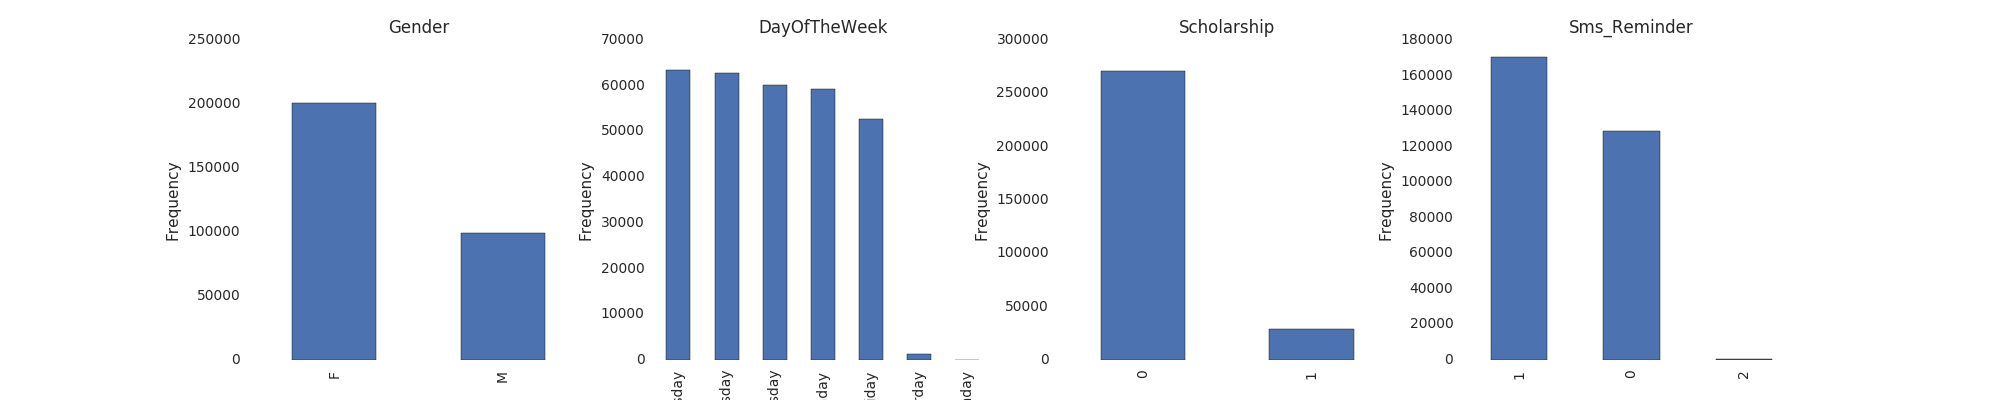

In [8]:
plt.figure(figsize=(20,4))
for i, dv1 in enumerate(discrete_vars1):
        plt.subplot(1,4,i+1)
        data[dv1].value_counts().plot(kind='bar', title=dv1)
        plt.ylabel('Frequency')
        
        display()

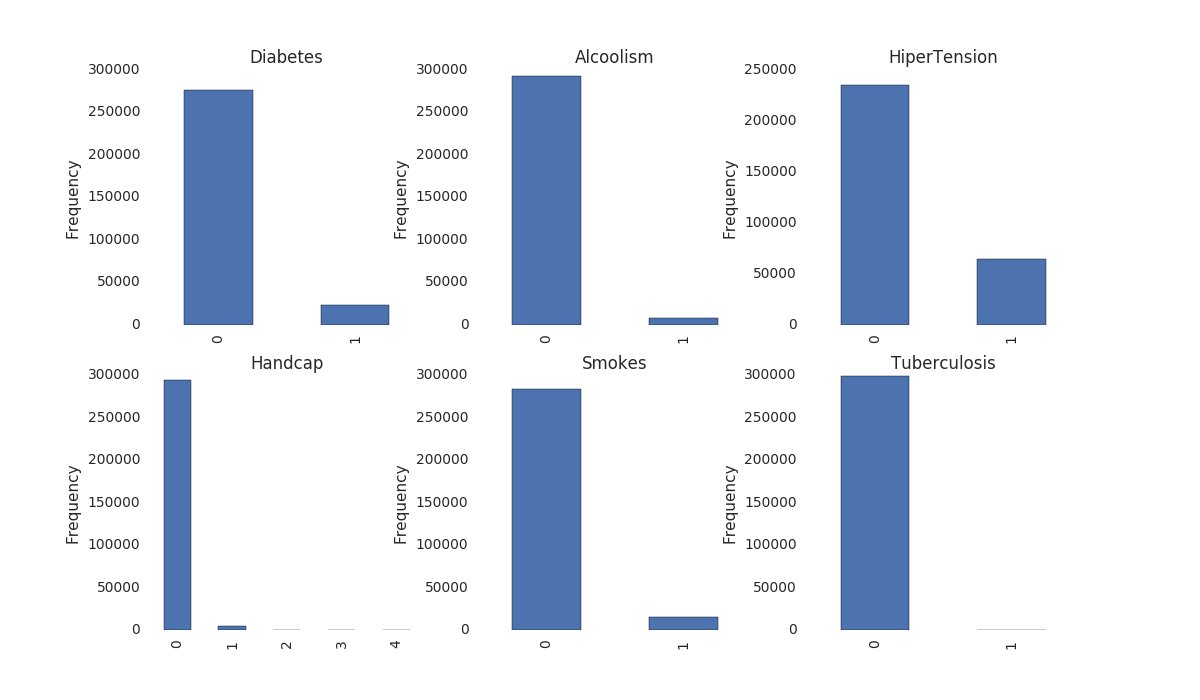

In [9]:
plt.figure(figsize=(12,7))
for i, dv2 in enumerate(discrete_vars2):
        plt.subplot(2,3,i+1)
        data[dv2].value_counts().plot(kind='bar', title=dv2)
        plt.ylabel('Frequency')
        
        display()

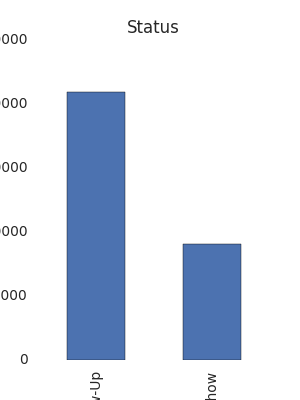

In [10]:
# plot bar chart for discrete varialbe 

plt.figure(figsize=(3,4))
for i, dv in enumerate(target_var):
    plt.subplot()
    data[dv].value_counts().plot(kind='bar', title=dv)
    plt.ylabel('Frequency')
    display()


## Data Cleaning
(Next Step : apply Class and function for cleaning pipeline)

In [12]:

# Data Cleaning 
# clean Age < 0
data = data[data['Age'] >= 0]

# Delete Handcap Col 
del data['Handcap']

# Clean negative Awaiting time --Absolute to positive 
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))

# categorial var
DayOfWeek_Cat_encoded = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}
data['DayOfTheWeek'] = data['DayOfTheWeek'].map(DayOfWeek_Cat_encoded)

# gender var 
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

    



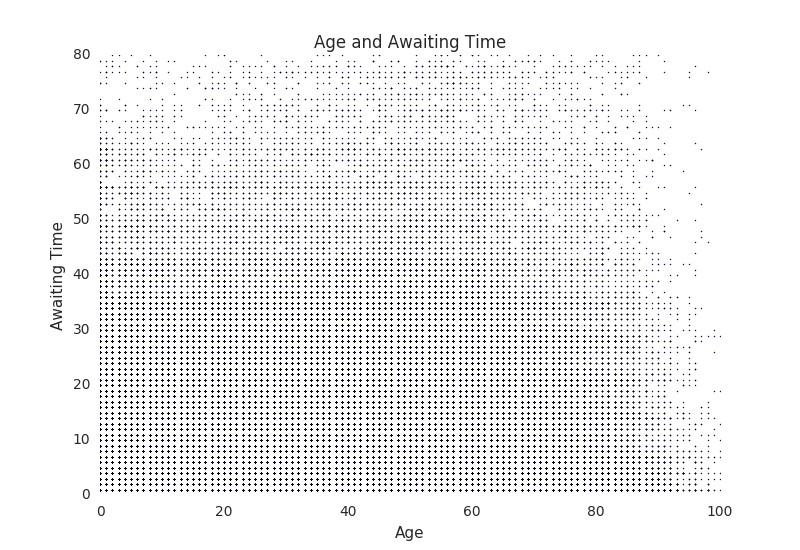

In [13]:

# Correlation between continuouse variables (Age vs AwaitingTime)
# Assumption : Increase of Age may prone to more visit. 
fig, axs = plt.subplots()
plt.scatter(data['Age'], data['AwaitingTime'], s=0.5)
plt.title('Age and Awaiting Time')
plt.xlabel('Age')
plt.ylabel('Awaiting Time')
plt.xlim(0, 100)
plt.ylim(0, 80)
display(fig)


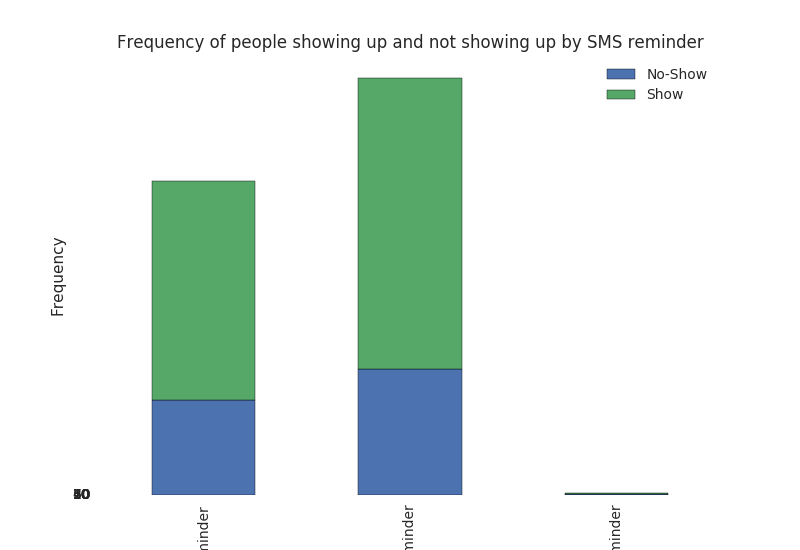

In [14]:
# Stack graph- SMS reminder vs Status
fig, axs = plt.subplots()
plt.figure(figsize=(5,8))
N=3
ind = np.arange(N)
data_dow_status = data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count().unstack('Status')
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by number of SMS reminders sent')
plt.xlabel('Number of SMS reminders')
plt.ylabel('Frequency')
plt.title('Frequency of people showing up and not showing up by SMS reminder')
plt.xticks(ind, ('no_reminder', '1 reminder', '2 reminder'))
plt.yticks(np.arange(0, 80, 10))
plt.legend(('No-Show', 'Show'),loc='upper right')
display()



Result :  increase number of SMS reminder does significant increase number of show

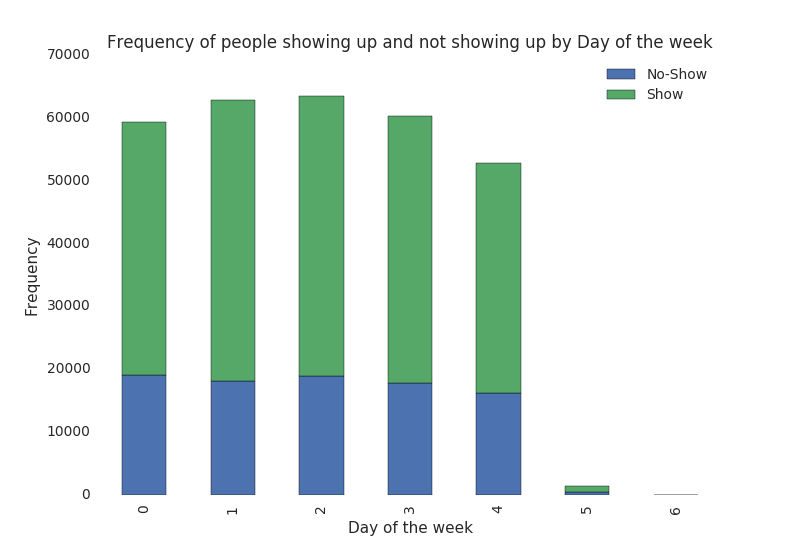

In [16]:
# Does day of the week effect number of show or no show
fig, axs = plt.subplots()
plt.figure(figsize=(5,15))
data_dow_status = data.groupby(['DayOfTheWeek', 'Status'])['DayOfTheWeek'].count().unstack('Status').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.legend(('No-Show', 'Show'),loc='upper right')
display()

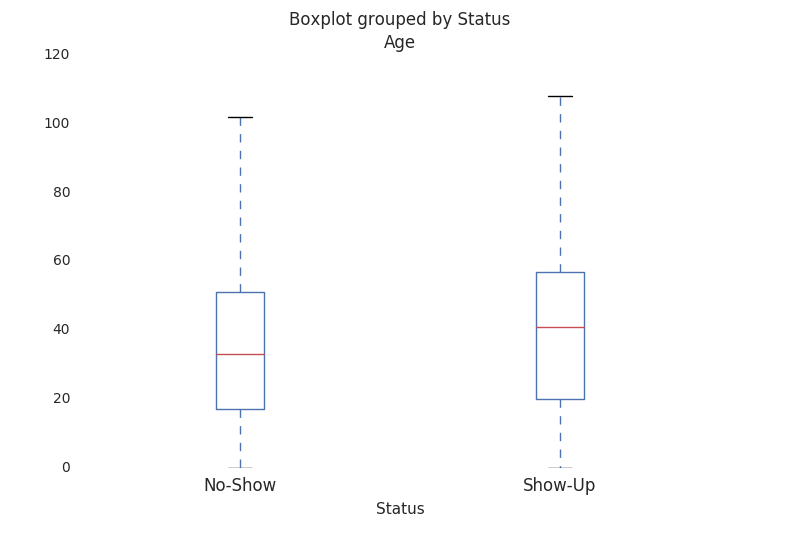

In [17]:
# Assumption Does Age effect showing status 

data.boxplot(column=['Age'], return_type='axes', by='Status')
plt.show()
display()

d 
Result :  Mean

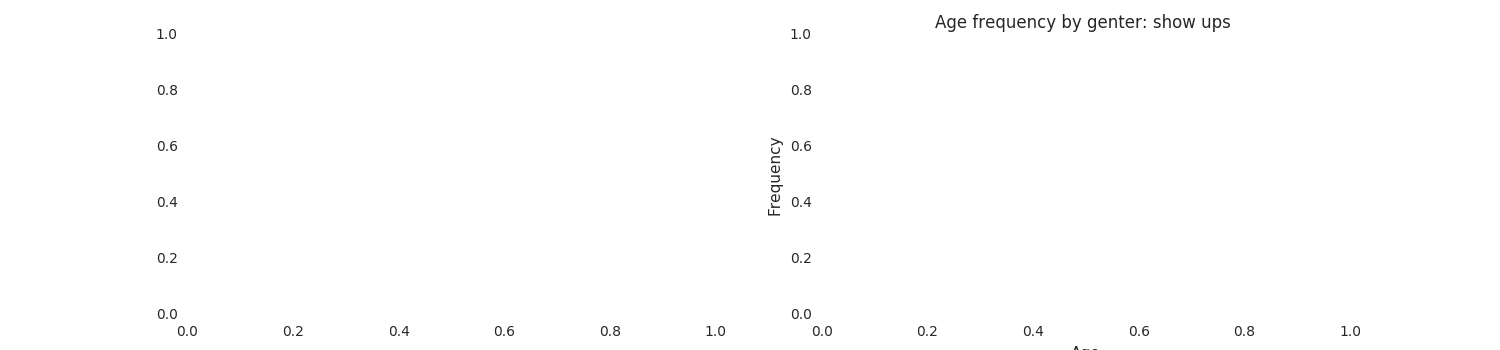

In [19]:
 

plt.figure(figsize=(15,3.5))

for i, status in enumerate(['no show ups', 'show ups']):
    
    data_show = data[data['Status']==i]
    plt.subplot(1, 2, i+1)
    
for gender in [0, 1]:
    data_gender = data_show[data_show['Gender']==gender]
    freq_age = data_gender['Age'].value_counts().sort_index()
  
    plt.title('Age frequency by genter: %s '%status)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')
    display()


In [20]:
for col in ['AppointmentRegistration', 'ApointmentData']:
    for index, component in enumerate(['year', 'month', 'day']):
        data['%s_%s'%(col, component)] = data[col].apply(lambda x: int(x.split('T')[0].split('-')[index]))

In [21]:
for index, component in enumerate(['hour', 'min', 'sec']):
    data['%s_%s'%('AppointmentRegistration', component)] = data['AppointmentRegistration'].apply(
	lambda x: int(x.split('T')[1][:-1].split(':')[index]))

In [22]:
print(data.head())
print(data.info())

Age Gender AppointmentRegistration ApointmentData DayOfTheWeek \
0 19 1 2014-12-16T14:46:25Z 2015-01-14T00:00:00Z 2 
1 24 0 2015-08-18T07:01:26Z 2015-08-19T00:00:00Z 2 
2 4 0 2014-02-17T12:53:46Z 2014-02-18T00:00:00Z 1 
3 5 1 2014-07-23T17:02:11Z 2014-08-07T00:00:00Z 3 
4 38 1 2015-10-21T15:20:09Z 2015-10-27T00:00:00Z 1 

 Status Diabetes Alcoolism HiperTension Smokes \
0 Show-Up 0 0 0 0 
1 Show-Up 0 0 0 0 
2 Show-Up 0 0 0 0 
3 Show-Up 0 0 0 0 
4 Show-Up 0 0 0 0 

 ... AwaitingTime AppointmentRegistration_year \
0 ... 29 2014 
1 ... 1 2015 
2 ... 1 2014 
3 ... 15 2014 
4 ... 6 2015 

 AppointmentRegistration_month AppointmentRegistration_day \
0 12 16 
1 8 18 
2 2 17 
3 7 23 
4 10 21 

 ApointmentData_year ApointmentData_month ApointmentData_day \
0 2015 1 14 
1 2015 8 19 
2 2014 2 18 
3 2014 8 7 
4 2015 10 27 

 AppointmentRegistration_hour AppointmentRegistration_min \
0 14 46 
1 7 1 
2 12 53 
3 17 2 
4 15 20 

 AppointmentRegistration_sec 
0 25 
1 26 
2 46 
3 11 
4 9 

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 299994 entries, 0 to 299999
Data columns (total 23 columns):
Age 299994 non-null int64
Gender 299994 non-null int64
AppointmentRegistration 299994 non-null object
ApointmentData 299994 non-null object
DayOfTheWeek 299994 non-null int64
Status 299994 non-null object
Diabetes 299994 non-null int64
Alcoolism 299994 non-null int64
HiperTension 299994 non-null int64
Smokes 299994 non-null int64
Scholarship 299994 non-null int64
Tuberculosis 299994 non-null int64
Sms_Reminder 299994 non-null int64
AwaitingTime 299994 non-null int64
AppointmentRegistration_year 299994 non-null int64
AppointmentRegistration_month 299994 non-null int64
AppointmentRegistration_day 299994 non-null int64
ApointmentData_year 299994 non-null int64
ApointmentData_month 299994 non-null int64
ApointmentData_day 299994 non-null int64
AppointmentRegistration_hour 299994 non-null int64
AppointmentRegistration_min 299994 non-null int64
AppointmentRegistration_sec 299994 non-null int64
dtypes: int64(20), object(3)
memory usage: 54.9+ MB
None

Note : further Analysis / we can do time series analysis to see the pattern of seasoning / weekend or weekday may effect show or noshow status ---> in order to manage resource during the holiday (if it a gov : aim to manage cost / if it a private hos -->aim to promote new service during...)

In [24]:
'''
working on Model performance functions using  ROC, AUC compare between ML model and features engineering.  don't complete yet. 


model_performance(model_name, x_train, y_train, y_test, y_pred):

    print 'Model name: %s'%model_name
    print 'Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred)
    print 'Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred)
    print 'Train accuracy: %f'%clf.score(x_train, y_train)

    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print 'Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr)
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    display()
'''

Out[ 17 ]: "\nworking on Model performance functions using ROC, AUC compare between ML model and features engineering. don't complete yet. \n\n\nmodel_performance(model_name, x_train, y_train, y_test, y_pred):\n\n print 'Model name: %s'%model_name\n print 'Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred)\n print 'Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred)\n print 'Train accuracy: %f'%clf.score(x_train, y_train)\n\n fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)\n print 'Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr)\n \n false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)\n roc_auc = metrics.auc(false_positive_rate, true_positive_rate)\n \n plt.title('Receiver Operating Characteristic')\n plt.plot(false_positive_rate, true_positive_rate, 'b',\n label='AUC = %0.2f'% roc_auc)\n plt.legend(loc='lower right')\n plt.plot([0,1],[0,1],'r--')\n plt.xlim([-0.1,1.2])\n plt.ylim([-0.1,1.2])\n plt.ylabel('True Positive Rate')\n plt.xlabel('False Positive Rate')\n plt.show()\n display()\n"

In [25]:
features_of_choice = ['Age', 'Gender', 'DayOfTheWeek', 'Diabetes',
'Alcoolism', 'HiperTension',
                        'Smokes', 'Scholarship', 'Tuberculosis',
                        'Sms_Reminder',
                        'AwaitingTime', 'AppointmentRegistration_year',
                        'AppointmentRegistration_month',
                        'AppointmentRegistration_day', 'ApointmentData_year', 'ApointmentData_month',
                        'ApointmentData_day', 'AppointmentRegistration_hour', 'AppointmentRegistration_min',
                        'AppointmentRegistration_sec']

x_df = data[features_of_choice]
x = np.array(data[features_of_choice])
y = np.array(data['Status'])
x_df.columns




Out[ 18 ]: 
Index([u'Age', u'Gender', u'DayOfTheWeek', u'Diabetes', u'Alcoolism',
 u'HiperTension', u'Smokes', u'Scholarship', u'Tuberculosis',
 u'Sms_Reminder', u'AwaitingTime', u'AppointmentRegistration_year',
 u'AppointmentRegistration_month', u'AppointmentRegistration_day',
 u'ApointmentData_year', u'ApointmentData_month', u'ApointmentData_day',
 u'AppointmentRegistration_hour', u'AppointmentRegistration_min',
 u'AppointmentRegistration_sec'],
 dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

create Model Shells

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models = []
models.append(('LRG', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))



cross_val score ---> get Baseline Model.

In [30]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LRG: 0.697912 (0.002464)
CART: 0.587604 (0.003102)
RF: 0.644868 (0.003832)

In [31]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [32]:
'''
for mode_name in models:
    return model_performance(model_name, x_train, y_train, y_test, y_pred)
    '''

Out[ 23 ]: '\nfor mode_name in models:\n return model_performance(model_name, x_train, y_train, y_test, y_pred)\n '

Choose random forest to be baseline model
Baseline RF Model Evaluation (ROC AUC)

### Benefits of Tree-Based Models
1. Works for both classification and regression
2. Handles categorical features naturally
3. No assumption of distributions
4. Can handle non-linear interactions 
5. No need for feature scaling / transformation
6. Handles missing values in the variables

In [35]:
clf_rfc = RandomForestClassifier(oob_score=True, random_state=42)
clf_rfc.fit(x_train,y_train)
print("The Out-of-bag Score is:", clf_rfc.oob_score_)

/databricks/python/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
 warn("Some inputs do not have OOB scores. "
/databricks/python/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
 predictions[k].sum(axis=1)[:, np.newaxis])
('The Out-of-bag Score is:', 0.59253791756946594)

In [36]:
clf_rfc.feature_importances_

Out[ 25 ]: 
array([ 0.12992136, 0.0199535 , 0.04942861, 0.00545047, 0.00362395,
 0.00962105, 0.00412631, 0.00480093, 0.00022488, 0.01306847,
 0.09061005, 0.01519153, 0.05347336, 0.09588844, 0.01411451,
 0.05255604, 0.09111728, 0.08006521, 0.13311833, 0.13364573])

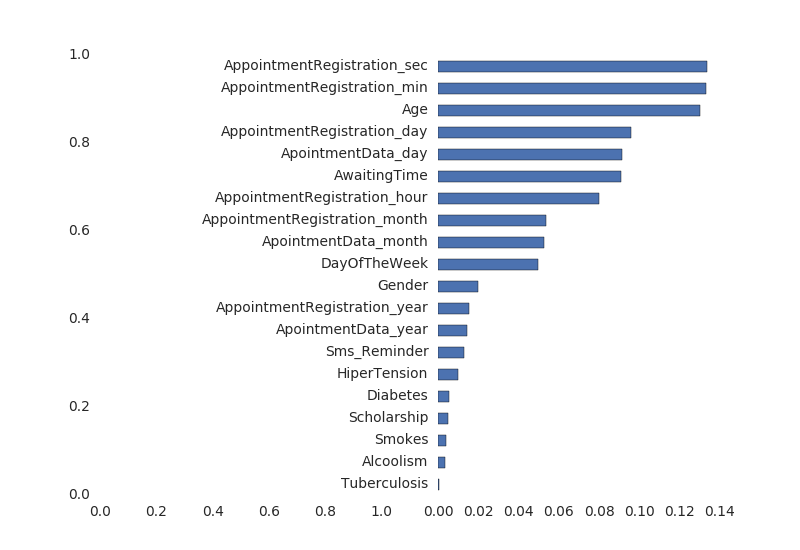

In [37]:
plt.figure(figsize=(10,3.5))
feat = pd.Series(clf_rfc.feature_importances_, index=x_df.columns)
print(feat)
feat.sort_values(ascending=True, inplace = True)
fig,ax = plt.subplots(1,2)
feat.plot(kind='barh')
display(fig)

In [38]:
feature_important = ['AwaitingTime','DayOfTheWeek','Gender','Age','AppointmentRegistration_sec']
x_fea = np.array(data[feature_important])
y_fea = np.array(data['Status'])


In [39]:
from sklearn.model_selection import train_test_split
x_train_fea, x_test_fea, y_train_fea, y_test_fea = train_test_split(x_fea, y_fea, test_size=0.3,random_state=1)

In [40]:
clf_rfc = RandomForestClassifier(oob_score=True, random_state=42)
clf_rfc.fit(x_train_fea,y_train_fea)
print("The Out-of-bag Score is:", clf_rfc.oob_score_)

('The Out-of-bag Score is:', 0.58451867901616705)

include most feature important (AppointmentRegistration_sec) decrease accuracy score.  

1. USE Oob score at 59% as a baseline model (RandomForest). 
2. Try Xgboost Model and feature engineering to improve Accuracy Score.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

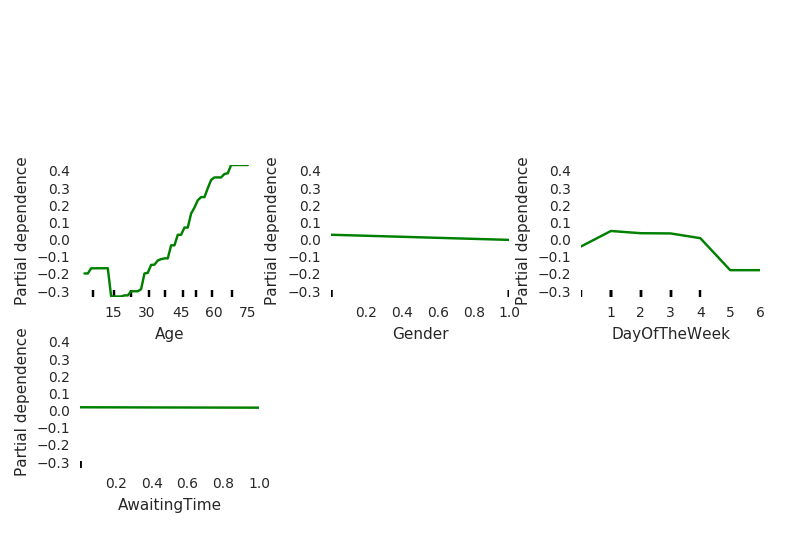

In [43]:
clf = GradientBoostingClassifier()
feature_important = ['Age','Gender','DayOfTheWeek','AwaitingTime']

my_imputer = Imputer()
imputed_appt_x = my_imputer.fit_transform(x_train)

clf.fit(imputed_appt_x, y_train)
fig,ax = plt.subplots(figsize=(10,7))
plot_partial_dependence(clf, imputed_appt_x, features= ['Age','Gender','DayOfTheWeek','AwaitingTime'],
                                     feature_names=feature_important,
                                       n_jobs=3, grid_resolution=50)
display()

In [44]:
import xgboost as xgb
model = xgb.XGBRegressor()


#### currently working on Xgboost and hyperparameter tuning. 
next step  
1. handtune param_grid to get range of each parameter
2. use GridSearchCV find best model 
3. get best model score 



 for leaning roadmap
1. apply this project on Spark 
2. finish Model performance with others score (ROC/AUC/RMSE/MSE etc.. ), understanding each Scoring method.
3. Apply same project to deep learning.  
4. working to understand feature selection. 
5. progress from Kaggle datasets to real sample dataset (health care)
https://catalog.data.gov/dataset/va-personal-health-record-non-identifiable-data
6. this datasets is a chunk of text file, using Regex find the string pattern to create table dataset. 
7. this datasets has text description that require text analytics. 

for image recognition
1. get health image datasets from CT scan or MRI, apply NN on Spark + GPU for Dicease classification model

In [46]:
# Define Parameters
param_grid = {"max_depth": [2,3,10],
              "max_features" : [1.0,0.3,0.1],
              "min_samples_leaf" : [3,5,9],
              "n_estimators": [50,100,300],
              "learning_rate": [0.05,0.1,0.02,0.2]}

In [47]:
# Perform Grid Search 
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(x_train, y_train)

--------------------------------------------------------------------------- 
 JoblibValueError Traceback (most recent call last)
 <command-3648069056852430> in <module> () 
 1 # Perform Grid Search 
 2 from sklearn . model_selection import GridSearchCV 
 ----> 3 gs_cv = GridSearchCV ( model , param_grid = param_grid , cv = 3 , verbose = 10 , n_jobs = - 1 ) . fit ( x_train , y_train ) 

 /databricks/python/local/lib/python2.7/site-packages/sklearn/model_selection/_search.pyc in fit (self, X, y, groups) 
 943 train / test set . 
 944 """
 --> 945 return self . _fit ( X , y , groups , ParameterGrid ( self . param_grid ) ) 
 946 
 947 

 /databricks/python/local/lib/python2.7/site-packages/sklearn/model_selection/_search.pyc in _fit (self, X, y, groups, parameter_iterable) 
 562 return_times = True , return_parameters = True , 
 563 error_score=self.error_score)
 --> 564 for parameters in parameter_iterable 
 565 for train, test in cv_iter)
 566 

 /databricks/python/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.pyc in __call__ (self, iterable) 
 766 # consumption. 
 767 self . _iterating = False 
 --> 768 self . retrieve ( ) 
 769 # Make sure that we get a last message telling us we are done 
 770 elapsed_time = time . time ( ) - self . _start_time 

 /databricks/python/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.pyc in retrieve (self) 
 717 ensure_ready = self . _managed_backend 
 718 backend . abort_everything ( ensure_ready = ensure_ready ) 
 --> 719 raise exception 
 720 
 721 def __call__ ( self , iterable ) : 

 JoblibValueError : JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/tmp/1554141974656-0/PythonShell.py in <module>()
 1043 print(time.asctime(), "Python shell executor start", file=stderr)
 1044 shell.executor.run()
 1045 
 1046 if __name__ == '__main__':
 1047 try:
-> 1048 launch_process()
 1049 except Exception as e:
 1050 print("Could not launch process", str(e), traceback.format_exc(), file=stderr)
 1051 raise e
 1052 except:

...........................................................................
/tmp/1554141974656-0/PythonShell.py in launch_process()
 1039 signal.signal(signal.SIGINT, signal.default_int_handler)
 1040 if memoryLimit:
 1041 # limit the total virtual memory
 1042 resource.setrlimit(resource.RLIMIT_AS, (memoryLimit << 20, memoryLimit << 20))
 1043 print(time.asctime(), "Python shell executor start", file=stderr)
-> 1044 shell.executor.run()
 shell.executor.run = <bound method Executor.run of <__main__.Executor object>>
 1045 
 1046 if __name__ == '__main__':
 1047 try:
 1048 launch_process()

...........................................................................
/tmp/1554141974656-0/PythonShell.py in run(self=<__main__.Executor object>)
 263 # See https://mail.python.org/pipermail/python-3000/2007-February/005672.html
 264 if six.PY2:
 265 sys.exc_clear()
 266 # Redirect the output while in this section
 267 with self.console:
--> 268 self.shell.shell.run_cell(command_id, cmd, store_history=True)
 self.shell.shell.run_cell = <bound method IPythonShell.run_cell of <__main__.IPythonShell object>>
 command_id = 3648069056852430L
 cmd = u'# Perform Grid Search \nfrom sklearn.model_sel...3, verbose=10, n_jobs=-1 ).fit(x_train, y_train)'
 269 self.result.put(cid)
 270 except KeyboardInterrupt:
 271 pass # interrupted outside of shell
 272 except:

...........................................................................
/tmp/1554141974656-0/PythonShell.py in run_cell(self=<__main__.IPythonShell object>, command_id=3648069056852430L, raw_cell=u'# Perform Grid Search \nfrom sklearn.model_sel...3, verbose=10, n_jobs=-1 ).fit(x_train, y_train)', store_history=True, silent=False, shell_futures=True)
 591 
 592 def run_cell(self, command_id, raw_cell, store_history=False, silent=False, shell_futures=True):


In [48]:
# Best hyperparmeter setting
gs_cv.best_estimator_

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3648069056852429> in <module> () 
 1 # Best hyperparmeter setting 
 ----> 2 gs_cv . best_estimator_ 

 NameError : name 'gs_cv' is not defined

In [49]:
best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_features=1.0, min_child_weight=1,
       min_samples_leaf=3, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [50]:

# Create eval_set
eval_set = [(X_train_2, y_train_2), (X_test_2, y_test_2)]

# Fit our model to the training set
best_model.fit(X_train_2, y_train_2, eval_set=eval_set, verbose=False)

# Make predictions with test data
y_pred = best_model.predict(X_test_2)
predictions = [round(value) for value in y_pred]

# Retrieve performance metrics
results = best_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot log loss curve
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
display(fig)

In [51]:
# Plot basic feature importance chart
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(best_model, height=0.5, ax=ax)
display(fig)